In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
homes = pd.read_csv('Data/homes_may_17.csv')

Our data is a snapshot of all of the single-family listings in Los Angles on May 17 from Realtor.com. It was extracted as a json file with a scrapper and converted to a csv. 

In [45]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [46]:
homes.head()

,id,price,beds,baths,garage,stories,house_type,lot_sqft,sqft,year_built,address,postal_code,state,city,tags,sold_price,sold_date,type,lat,lon,county,baseball,basement,basketball,basketball_court,beach,beautiful_backyard,big_bathroom,big_lot,big_yard,carport,cathedral_ceiling,central_air,central_heat,city_view,clubhouse,coffer_ceiling,community_boat_facilities,community_clubhouse,community_elevator,community_golf,community_gym,community_horse_facilities,community_outdoor_space,community_park,community_security_features,community_swimming_pool,community_tennis_court,conversation_pit,corner_lot,courtyard_entry,courtyard_style,cul_de_sac,den_or_office,detached_guest_house,dining_room,disability_features,dishwasher,dual_master_bedroom,efficient,elevator,energy_efficient,ensuite,equestrian,exposed_brick,family_room,farm,fenced_yard,fireplace,first_floor_master_bedroom,fixer_upper,floor_plan,forced_air,front_porch,fruit_trees,furniture,game_room,garage_1_or_more,garage_2_or_more,garage_3_or_more,gated_community,golf_course,golf_course_lot_or_frontage,golf_course_view,gourmet_kitchen,granite_kitchen,greenbelt,greenhouse,groundscare,guest_house,guest_parking,handicap_access,hardwood_floors,hidden_room,high_ceiling,hill_or_mountain_view,hoa,hollywood_sign_view,horse_facilities,horse_property,horse_stables,in_law_unit,indoor_basketball_court,investment_opportunity,jack_and_jill_bathroom,kitchen_island,kosher_diner,lake,lake_view,large_kitchen,large_porch,laundry_room,lease_option,library,low_hoa,maintenance,marina,master_bathroom,master_bedroom,master_suite,media_room,medicalcare,modern_kitchen,mountain_view,new_construction,new_roof,no_hoa,ocean_view,open_floor_plan,open_house,open_kitchen,outbuilding,outdoor_kitchen,park,pets_allowed,playground,pond,private_backyard,private_bathroom,private_courtyard,private_parking,ranch,recording_studio,recreation_facilities,rental_property,river_view,runway,rv_or_boat_parking,rv_parking,security,senior_community,shopping,single_story,smart_homes,soccer,solar_panels,solar_system,spa_or_hot_tub,swimming_pool,tennis,tennis_court,theater_room,trails,two_kitchen,two_master_suites,two_or_more_stories,updated_kitchen,vaulted_ceiling,view,views,volleyball,washer_dryer,water_view,waterfront,white_kitchen,wine_cellar,wooded_land,wrap_around_porch
0,2681523432,4480000,4.0,5.0,NaN,2.0,single_family,8999.0,3410.0,1946.0,12427 W Sunset Blvd,90049,CA,Los Angeles,"['central_air', 'central_heat', 'den_or_office...",2728000.0,2022-06-14,mls,34.058064,-118.481655,Los Angeles,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,1431594678,3995000,5.0,7.0,NaN,2.0,single_family,11857.0,4100.0,1951.0,6349 W 78th St,90045,CA,Los Angeles,"['central_air', 'central_heat', 'community_out...",2125000.0,2017-09-14,mls,33.971306,-118.397921,Los Angeles,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,2267633354,1998000,5.0,4.0,NaN,2.0,single_family,5953.0,2607.0,1939.0,3573 Greenfield Ave,90034,CA,Los Angeles,"['central_air', 'central_heat', 'city_view', '...",488500.0,1999-09-16,mls,34.019258,-118.417126,Los Angeles,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,1609470097,1149000,4.0,3.0,2.0,2.0,single_family,16862.0,2846.0,1963.0,11562 Andasol

## Cleaning

### Dropping, Fixing, and Combining Columns

For flipping single family homes, in general even after fixing up the home, the price will not exceed 5 million dollars so we will restrict our analysis to homes listed below 5 million dollars.

In [81]:
homes_cleaned  = homes.copy()

homes_cleaned = homes_cleaned.loc[homes_cleaned['price'] < 5000000]

Getting rid of meaningless or useless columns.

In [82]:
homes_cleaned.drop(columns=['id', 'house_type', 'tags', 'view', 'views', 'county', 'state'])

,price,beds,baths,garage,stories,lot_sqft,sqft,year_built,address,postal_code,city,sold_price,sold_date,type,lat,lon,baseball,basement,basketball,basketball_court,beach,beautiful_backyard,big_bathroom,big_lot,big_yard,carport,cathedral_ceiling,central_air,central_heat,city_view,clubhouse,coffer_ceiling,community_boat_facilities,community_clubhouse,community_elevator,community_golf,community_gym,community_horse_facilities,community_outdoor_space,community_park,community_security_features,community_swimming_pool,community_tennis_court,conversation_pit,corner_lot,courtyard_entry,courtyard_style,cul_de_sac,den_or_office,detached_guest_house,dining_room,disability_features,dishwasher,dual_master_bedroom,efficient,elevator,energy_efficient,ensuite,equestrian,exposed_brick,family_room,farm,fenced_yard,fireplace,first_floor_master_bedroom,fixer_upper,floor_plan,forced_air,front_porch,fruit_trees,furniture,game_room,garage_1_or_more,garage_2_or_more,garage_3_or_more,gated_community,golf_course,golf_course_lot_or_frontage,golf_course_view,gourmet_kitchen,granite_kitchen,greenbelt,greenhouse,groundscare,guest_house,guest_parking,handicap_access,hardwood_floors,hidden_room,high_ceiling,hill_or_mountain_view,hoa,hollywood_sign_view,horse_facilities,horse_property,horse_stables,in_law_unit,indoor_basketball_court,investment_opportunity,jack_and_jill_bathroom,kitchen_island,kosher_diner,lake,lake_view,large_kitchen,large_porch,laundry_room,lease_option,library,low_hoa,maintenance,marina,master_bathroom,master_bedroom,master_suite,media_room,medicalcare,modern_kitchen,mountain_view,new_construction,new_roof,no_hoa,ocean_view,open_floor_plan,open_house,open_kitchen,outbuilding,outdoor_kitchen,park,pets_allowed,playground,pond,private_backyard,private_bathroom,private_courtyard,private_parking,ranch,recording_studio,recreation_facilities,rental_property,river_view,runway,rv_or_boat_parking,rv_parking,security,senior_community,shopping,single_story,smart_homes,soccer,solar_panels,solar_system,spa_or_hot_tub,swimming_pool,tennis,tennis_court,theater_room,trails,two_kitchen,two_master_suites,two_or_more_stories,updated_kitchen,vaulted_ceiling,volleyball,washer_dryer,water_view,waterfront,white_kitchen,wine_cellar,wooded_land,wrap_around_porch
0,4480000,4.0,5.0,NaN,2.0,8999.0,3410.0,1946.0,12427 W Sunset Blvd,90049,Los Angeles,2728000.0,2022-06-14,mls,34.058064,-118.481655,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,3995000,5.0,7.0,NaN,2.0,11857.0,4100.0,1951.0,6349 W 78th St,90045,Los Angeles,2125000.0,2017-09-14,mls,33.971306,-118.397921,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,1998000,5.0,4.0,NaN,2.0,5953.0,2607.0,1939.0,3573 Greenfield Ave,90034,Los Angeles,488500.0,1999-09-16,mls,34.019258,-118.417126,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1149000,4.0,3.0,2.0,2.0,16862.0,2846.0,1963.0,11562 Andasol Ave,91344,Granada Hills,265000.0,1987-06-26,mls,34.281247,-118.512298,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0

The basketball and basketball_court columns seem to be describing the same feature. It can be seen that .894 percent of their rows are identical, so it is a relatively safe assumption. The difference can be due to the indoor_basketball_court column, which may be exclusively labeled as 1.

In [83]:
(homes_cleaned['basketball'] == homes_cleaned['basketball_court']).sum()/len(homes)

0.8944487881157154

To deal with this I am going to make the assumption that if at least one of these variables for any given row takes on the value of 1, then the house does indeed have a basketball court, so I will adjust basketball_court to take on 1 if basketball takes on 1. Afterwards, the basketball column will be dropped as it is redundant. We will also mark a 1 in the column of indoor_basketball_court as simply containing a basketball_court, and delete the indoor_basketball_court column. Generally indoor basketabll courts are for very expensive homes, which are outside the scope of flipping houses. 

In [84]:
homes_cleaned['basketball_court'] = homes_cleaned['basketball_court'] | homes_cleaned['basketball'] | homes_cleaned['indoor_basketball_court']

homes_cleaned.drop(columns=['basketball', 'indoor_basketball_court'] , inplace=True)

There are binary columns relating to number of beds, baths, and garages which are redundant. We will drop these columns. 

In [85]:
homes_cleaned.drop(columns = ['garage_1_or_more', 'garage_2_or_more', 'garage_3_or_more', 'two_or_more_stories'], inplace=True)

### Missing Values

Homes without a price, stories, sqft or lot sqft will dropped. Similary any home with less than 300 sqft will be dropped. 

In [86]:
homes_cleaned.dropna(subset=['price', 'stories', 'lot_sqft', 'sqft'], inplace=True)

homes_cleaned = homes_cleaned.loc[homes_cleaned['sqft'] > 300]

Missing values for bed, bath, and garage should be encoded as zero.

In [87]:
homes_cleaned['garage'] = homes_cleaned['garage'].fillna(0)

homes_cleaned['beds'] = homes_cleaned['beds'].fillna(0)

homes_cleaned['baths'] = homes_cleaned['baths'].fillna(0)

## Univeriate Analysis

For Univeriate Analysis, I will focus on price, sqft, and year built.

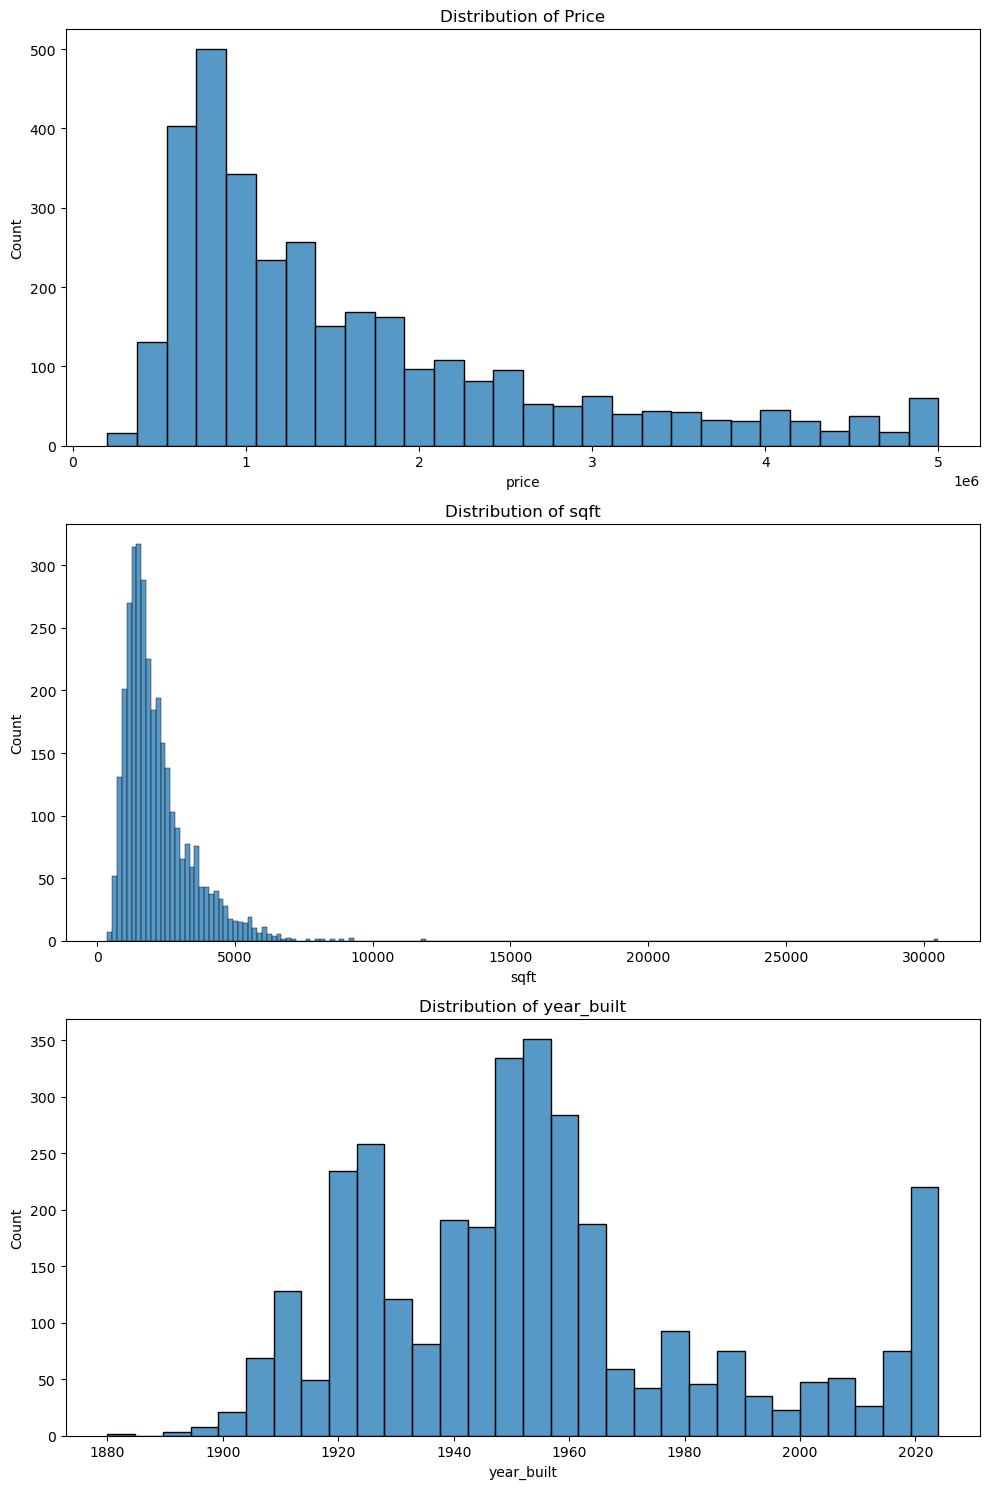

In [103]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # Adjust size as per your requirement

sns.histplot(data=homes_cleaned, x = 'price' ,ax=axs[0])
axs[0].set_title('Distribution of Price')

sns.histplot(data=homes_cleaned, x = 'sqft', ax=axs[1])
axs[1].set_title('Distribution of sqft')


sns.histplot(data=homes_cleaned, x = 'year_built' ,ax=axs[2])
axs[2].set_title('Distribution of year_built')

plt.tight_layout()  
plt.show()

It can be seen from the histograms that both the price and square footage of a home have distributions skewed right. There seems to be a extreme point in the square footage variable. The year built variable seems to follow a multimodal distribution with various local maximas. 

In [105]:
homes_cleaned[['price','sqft','year_built']].describe()

,price,sqft,year_built
count,3.309000e+03,3309.000000,3297.000000
mean,1.628729e+06,2182.304322,1954.642099
std,1.104788e+06,1285.770285,31.051690
min,2.000000e+05,376.000000,1880.000000
25%,7.999000e+05,1350.000000,1929.000000
50%,1.250000e+06,1827.000000,1951.000000
75%,2.100000e+06,2658.000000,1965.000000
max,4.999999e+06,30534.000000,2024.000000


The square footage variable has a maximum value which is more than a order of magnitude standard deviations above the mean. This should be further analyzed in the context of applying a model to determine if it should be dealt with and how.